In [ ]:
# Notebook investigating using the mca
#https://github.com/bluesky/ophyd/blob/master/ophyd/mca.py

In [40]:
from ophyd.mca import EpicsMCA, ROI


bruker = EpicsMCA('SISSY2EX:SDD00:mca1',name='bruker')


In [41]:
bruker.wait_for_connection()


In [42]:
bruker.summary()

data keys (* hints)
-------------------
 bruker_elapsed_real_time
 bruker_preset_real_time
 bruker_spectrum

read attrs
----------
preset_real_time     EpicsSignal         ('bruker_preset_real_time')
elapsed_real_time    EpicsSignalRO       ('bruker_elapsed_real_time')
spectrum             EpicsSignalRO       ('bruker_spectrum')

config keys
-----------
bruker_preset_real_time

configuration attrs
-------------------
preset_real_time     EpicsSignal         ('bruker_preset_real_time')

unused attrs
------------
stop_signal          EpicsSignal         ('bruker_stop_signal')
preset_live_time     EpicsSignal         ('bruker_preset_live_time')
elapsed_live_time    EpicsSignalRO       ('bruker_elapsed_live_time')
background           EpicsSignalRO       ('bruker_background')
mode                 EpicsSignal         ('bruker_mode')
rois                 Rois                ('bruker_rois')
start                EpicsSignal         ('bruker_start')
erase                EpicsSignal         ('br

In [58]:

bruker.rois.roi0.count.read()

{'bruker_rois_roi0_count': {'value': 3080209.0,
  'timestamp': 1632989158.225641}}

In [52]:

    
from datetime import datetime
now = datetime.now().strftime("%H:%M:%S")

def callback(status):
    
    now = datetime.now().strftime("%H:%M:%S")
    print(f"{status} has completed at {now}")

bruker.enable_wait.set('Disable')
status=bruker.trigger()
now = datetime.now().strftime("%H:%M:%S")
print(f"{status} has started at {now}"  )
status.add_callback(callback)

DeviceStatus(device=bruker, done=False, success=False) has started at 10:05:26
DeviceStatus(device=bruker, done=True, success=True) has completed at 10:05:47


In [57]:
bruker.read_attrs = ['spectrum']

In [31]:
bruker.read()

OrderedDict([('bruker_preset_real_time',
              {'value': 1.0, 'timestamp': 1632988456.161641}),
             ('bruker_elapsed_real_time',
              {'value': 1.0, 'timestamp': 1632988456.161641}),
             ('bruker_spectrum',
              {'value': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
               'timestamp': 1632988456.161641})])

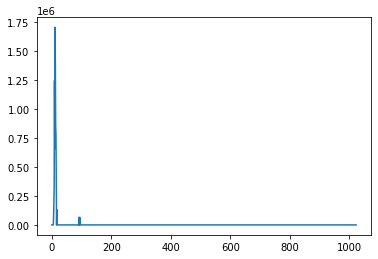

In [32]:
data = bruker.read()
x = data['bruker_spectrum']['value']
import matplotlib.pyplot as plt

plt.plot(x)

Now we will try with the Run Engine


In [33]:
from bluesky import RunEngine

RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

#Get the databroker https://gist.github.com/untzag/53281819709b1058c7708a250cbd3676
from databroker.v2 import temp
db = temp()

# Insert all metadata/data captured into db.
RE.subscribe(db.v1.insert)


1

In [34]:
from bluesky.plans import count

RE(count([bruker],2))



Transient Scan ID: 1     Time: 2021-09-30 09:55:34
Persistent Unique Scan ID: 'f5b8445b-8a01-46ba-9b95-2be21d2f1552'
New stream: 'primary'
+-----------+------------+
|   seq_num |       time |
+-----------+------------+
|         1 | 09:55:35.0 |
|         2 | 09:55:35.0 |
+-----------+------------+
generator count ['f5b8445b'] (scan num: 1)





('f5b8445b-8a01-46ba-9b95-2be21d2f1552',)

In [45]:
run = db[-1]

In [48]:
run.primary.read()

<xarray.Dataset>
Dimensions:                   (dim_0: 1024, time: 1)
Coordinates:
  * time                      (time) float64 1.633e+09
Dimensions without coordinates: dim_0
Data variables:
    bruker_preset_real_time   (time) float64 1.0
    bruker_elapsed_real_time  (time) float64 1.0
    bruker_spectrum           (time, dim_0) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0